In [ ]:
#@title Importing the Required Libraries

import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Importing the  Required Libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [ ]:
#@title importing the dataset
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('Mall_Customers.csv')

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [ ]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


<Axes: ylabel='Gender'>

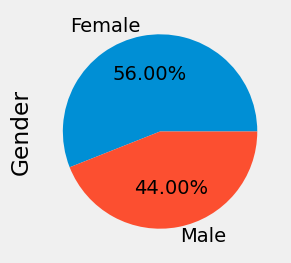

In [ ]:
plt.figure(figsize=(3,3))
pd.Series(dataset['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [ ]:
sns.countplot(x="Gender", data=dataset, palette="bwr")
plt.show()

In [ ]:
dataset['Gender'].value_counts()

In [ ]:
dataset.groupby('Gender').mean()

In [ ]:
#@title Checking for any Missing Values
missing_df =dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

In [ ]:
#@title Plotting the Annual Income Column vs the Spending Score
plt.figure(figsize = (10, 10))
plt.scatter(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(dataset['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(dataset['Spending Score (1-100)'],hist=False)
plt.title('Distplot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.

In [ ]:
labels = ['Female', 'Male']
size = dataset['Gender'].value_counts()
colors = ['lightgreen', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(dataset['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

In [ ]:
sns.pairplot(dataset)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(y='Annual Income (k$)', x='Age',hue='Gender', data=dataset)
plt.show()

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = dataset[dataset['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(dataset.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(dataset['Gender'], dataset['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(dataset['Gender'], dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.